<a href="https://colab.research.google.com/github/elvinaqa/HandsonML-and-DLTheory/blob/master/Classifier_XGBoost_LogReg_Random_Forest_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from xgboost import XGBClassifier

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
files.upload()

Saving preprocessed.csv to preprocessed.csv


{'preprocessed.csv': b'Reason_1,Reason_2,Reason_3,Reason_4,Month,DoW,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours\r\n0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4\r\n0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0\r\n0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2\r\n1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4\r\n0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2\r\n0,0,0,1,7,4,179,51,38,239.554,31,0,0,0,2\r\n0,0,0,1,7,4,361,52,28,239.554,27,0,1,4,8\r\n0,0,0,1,7,4,260,50,36,239.554,23,0,4,0,4\r\n0,0,1,0,7,0,155,12,34,239.554,25,0,2,0,40\r\n0,0,0,1,7,0,235,11,37,239.554,29,1,1,1,8\r\n1,0,0,0,7,0,260,50,36,239.554,23,0,4,0,8\r\n1,0,0,0,7,1,260,50,36,239.554,23,0,4,0,8\r\n1,0,0,0,7,2,260,50,36,239.554,23,0,4,0,8\r\n1,0,0,0,7,2,179,51,38,239.554,31,0,0,0,1\r\n0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,4\r\n1,0,0,0,7,4,246,25,41,239.554,23,0,0,0,8\r\n0,0,0,1,7,4,179,51,38,239.554,31,0,0,0,2\r\n0,0,1,0,7,0,179,51,38,239.554,31,0,0,0,8\r\n1,

In [ ]:
df = pd.read_csv("preprocessed.csv")

In [ ]:
df

,Reason_1,Reason_2,Reason_3,Reason_4,Month,DoW,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,8
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,3
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,8
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,2


In [ ]:
df.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month', 'DoW',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'], dtype=object)

In [ ]:
absent = np.where(df['Absenteeism Time in Hours'] > 3, 1, 0)

In [ ]:
df['Absent'] = absent
df

,Reason_1,Reason_2,Reason_3,Reason_4,Month,DoW,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Absent
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,8,1
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,3,0
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,8,1
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,2,0


In [ ]:
df.drop(['Absenteeism Time in Hours'], axis=1,inplace=True)
df

,Reason_1,Reason_2,Reason_3,Reason_4,Month,DoW,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absent
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,1
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,0
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,1
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,0


In [ ]:
x = df.drop(["Absent"], axis=1)

In [ ]:
x.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month', 'DoW',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [ ]:
y = df['Absent']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
scaled_x = ss.fit_transform(x)

In [ ]:
scaled_x

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(560, 14)

In [ ]:
x_test.shape

(140, 14)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV


In [ ]:
lg = LogisticRegressionCV()

In [ ]:
lg.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
lg.score(x_train, y_train)

0.775

In [ ]:
lg.score(x_test, y_test)

0.75

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model.score(x_train, y_train)

0.8446428571428571

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.00%


Use StandardScaler to process the column data
Train Test Split ratio is 0.3
X_train shape: (560, 14)
y_train shape: (560,)
Start Feeding Data
Start Training
Start Predicting

 Accuracy
Score : 0.7357
AUC: 0.856077
F1 Score: 0.689076


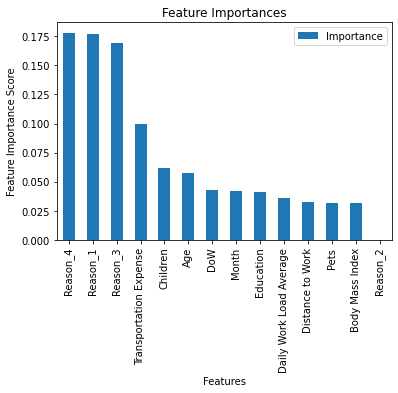

                   Features  Importance
3                  Reason_4    0.177879
0                  Reason_1    0.176777
2                  Reason_3    0.168840
6    Transportation Expense    0.099746
12                 Children    0.062077
8                       Age    0.057352
5                       DoW    0.042688
4                     Month    0.042099
11                Education    0.041074
9   Daily Work Load Average    0.035650
7          Distance to Work    0.032438
13                     Pets    0.031851
10          Body Mass Index    0.031529
1                  Reason_2    0.000000
['Reason_4', 'Reason_1', 'Reason_3', 'Transportation Expense', 'Children', 'Age', 'DoW', 'Month', 'Education', 'Daily Work Load Average', 'Distance to Work', 'Pets', 'Body Mass Index', 'Reason_2']
Total Time is:  0.0188629150390625


In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import xgboost as xgb
from xgboost import XGBClassifier
from collections import Counter
import time

def data_processor(df=df):
    features_to_select = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month', 'DoW',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets']

    print('Use StandardScaler to process the column data')
    scaler = StandardScaler()
    df[df.columns[:-1].tolist()] = scaler.fit_transform(df[df.columns[:-1].tolist()])
    # print(df.head(5))
    X = df[df.columns[:-1].tolist()]
    X = X[features_to_select]
    y = df[df.columns[-1]]

    print("Train Test Split ratio is 0.3")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")

    return X_train, X_test, y_train, y_test

def xgb_classifier(X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    """
    # {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3} 0.862920874517388
    # {'colsample_bytree': 1.0, 'gamma': 0.2} 0.871
    # {'gamma': 0.2, 'scale_pos_weight': 1} 0.8702009952422571
    # {'subsample': 0.6} 0.864310306628855
    """
    alg = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

    if useTrainCV:
        print("Start Feeding Data")
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        # xgtest = xgb.DMatrix(X_test.values, label=y_test.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    print('Start Training')
    alg.fit(X_train, y_train, eval_metric='auc')

    # param_test1 = {}
    # gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
    #                                                 min_child_weight=3, gamma=0.2, subsample=0.8,
    #                                                 colsample_bytree=1.0,
    #                                                 objective='binary:logistic', nthread=4, scale_pos_weight=1,
    #                                                 seed=27),
    #                         param_grid=param_test1,
    #                         scoring='f1',
    #                         n_jobs=4, iid=False, cv=5)
    # gsearch1.fit(X_train, y_train)
    # print(gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_)

    print("Start Predicting")
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]

    print("\n Accuracy")
    print("Score : %.4g" % metrics.accuracy_score(y_test, predictions))
    print("AUC: %f" % metrics.roc_auc_score(y_test, pred_proba))
    print("F1 Score: %f" % metrics.f1_score(y_test, predictions))

    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()
    print(res_df)
    print(res_df["Features"].tolist())


def logistic_regression():
    """
    F1 score is: 0.7285714285714285
    AUC Score is: 0.9667565771367231
    """
    X_train, X_test, y_train, y_test = data_processor()
    clf = LogisticRegression(C=1e5)
    clf.fit(X_train, y_train)

    print("Score: ", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))


def logistic_with_smote():
    X_train, X_test, y_train, y_test = data_processor()

    clf = LogisticRegression(C=1e5)
    clf.fit(X_train, y_train)
    # build model with SMOTE imblearn
    smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), clf)

    smote_model = smote_pipeline.fit(X_train, y_train)
    smote_prediction = smote_model.predict(X_test)
    smote_prediction_proba = smote_model.predict_proba(X_test)[:, 1]

    print(classification_report_imbalanced(y_test, smote_prediction))
    print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))
    print("SMOTE AUC score: ", roc_auc_score(y_test, smote_prediction_proba))
    print("SMOTE F1 Score: ", f1_score(y_test, smote_prediction))


def randomForest():
    """
    F1 score is: 0.7857142857142857
    AUC Score is: 0.9450972761670293
    """
    X_train, X_test, y_train, y_test = data_processor()
    # parameters = {'n_estimators': [10, 20, 30, 50], 'max_depth': [2, 3, 4]}

    clf = RandomForestClassifier(max_depth=4, n_estimators=20)
    # clf = GridSearchCV(alg, parameters, n_jobs=4)
    clf.fit(X_train, y_train)
    print("Score: ", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))

    # print("The Features Importance are: ")  # for feature, value in zip(X_train.columns, clf.feature_importances_):
    #     print(feature, value)
    # print(clf.best_estimator_)
    # print(clf.best_params_)
    # print(clf.best_score_)


def neural_nets():
    """
    Score:  0.9994148145547324
    F1 score is: 0.822695035460993
    AUC Score is: 0.9608730286337007
    """
    X_train, X_test, y_train, y_test = data_processor()
    clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100,))

    clf.fit(X_train, y_train)
    print("Score: ", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred_proba)))


if __name__ == "__main__":
    # logistic_regression()
    # randomForest()
    # logistic_with_smote()
    # neural_nets()
    start = time.time()
    X_train, X_test, y_train, y_test = data_processor()
    xgb_classifier(X_train, X_test, y_train, y_test)
    print("Total Time is: ", (time.time() - start)/60)

In [ ]:
data_processor(df)

Use StandardScaler to process the column data
Train Test Split ratio is 0.3
X_train shape: (490, 14)
y_train shape: (490,)


(     Reason_1  Reason_2  Reason_3  ...  Education  Children      Pets
 6    -0.57735 -0.092981 -0.314485  ...  -0.447980 -0.019280  2.843016
 475  -0.57735 -0.092981 -0.314485  ...  -0.447980  0.880469  0.268487
 71   -0.57735 -0.092981 -0.314485  ...  -0.447980 -0.019280  0.268487
 517  -0.57735 -0.092981 -0.314485  ...  -0.447980  1.780219 -0.589690
 408  -0.57735 -0.092981 -0.314485  ...  -0.447980 -0.919030 -0.589690
 ..        ...       ...       ...  ...        ...       ...       ...
 359  -0.57735 -0.092981  3.179797  ...  -0.447980 -0.919030 -0.589690
 192  -0.57735 -0.092981 -0.314485  ...  -0.447980 -0.019280 -0.589690
 629  -0.57735 -0.092981  3.179797  ...  -0.447980 -0.019280  2.843016
 559  -0.57735 -0.092981 -0.314485  ...  -0.447980 -0.019280  1.126663
 684  -0.57735 -0.092981 -0.314485  ...   2.232242 -0.919030 -0.589690
 
 [490 rows x 14 columns],
      Reason_1  Reason_2  Reason_3  ...  Education  Children      Pets
 306 -0.577350 -0.092981 -0.314485  ...  -0.44798